#**Price Prediction Project**
#**Bangalore House price prediction**

 A property price prediction project using the Linear Regression model


The dataset used in this project was taken from kaggle
https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

The dataset consists of around 13k rows and 9 columns

Columns in the dataset

['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price']

Price --> lac INR

## Selecting and downloading the data

In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d amitabhajoy/bengaluru-house-price-data

  0% 0.00/195k [00:00<?, ?B/s]
100% 195k/195k [00:00<00:00, 80.5MB/s]


In [3]:
!unzip \*.zip

Archive:  bengaluru-house-price-data.zip
  inflating: Bengaluru_House_Data.csv  


## Data preparation and insights

In [4]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn
matplotlib.rcParams["figure.figsize"] = (20,10)

In [5]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
area_type,"[Super built-up Area, Plot Area, Built-up A..."
availability,"[19-Dec, Ready To Move, 18-May, 18-Feb, 18-Nov..."
location,"[Electronic City Phase II, Chikka Tirupathi, U..."
size,"[2 BHK, 4 Bedroom, 3 BHK, 4 BHK, 6 Bedroom, 3 ..."
society,"[Coomee , Theanmp, nan, Soiewre, DuenaTa, Jaad..."
total_sqft,"[1056, 2600, 1440, 1521, 1200, 1170, 2732, 330..."
bath,"[2.0, 5.0, 3.0, 4.0, 6.0, 1.0, 9.0, nan, 8.0, ..."
balcony,"[1.0, 3.0, nan, 2.0, 0.0]"
price,"[39.07, 120.0, 62.0, 95.0, 51.0, 38.0, 204.0, ..."


In [11]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
df[df['size'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000



society column has a lot of null values --> need to be dropped


## Data Cleaning 🧹

1) Columns to be dropped ( just to make our work a bit easier)


*   society ( contains 40% null values)
*   area_type
*   balcony
*   avilability

---
2) Dealing with null values

the remaining columns have a small percentage of null values, hence, we drop them

---







In [13]:
df = df.drop(['area_type','society','balcony','availability'],axis='columns')
df.shape

(13320, 5)

In [14]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df.shape

(13246, 5)

In [16]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df['size'] = [c.replace('Bedroom', 'BHK') for c in df['size']]
df['size'] = [c.replace('RK', 'BHK') for c in df['size']]
df['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '8 BHK', '7 BHK',
       '5 BHK', '11 BHK', '9 BHK', '27 BHK', '10 BHK', '19 BHK', '16 BHK',
       '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'], dtype=object)

In [18]:
df[df['size']=='43 BHK']  # would either be a 3 or 4 bhk rather than 43 bhk

,location,size,total_sqft,bath,price
4684,Munnekollal,43 BHK,2400,40.0,660.0


In [19]:
df[df['total_sqft']=='2400']  # most of the rows that have 2400 are 3/4 bhk

,location,size,total_sqft,bath,price
102,Kothanur,3 BHK,2400,2.0,150.0
325,Giri Nagar,4 BHK,2400,4.0,400.0
534,Hebbal,3 BHK,2400,4.0,245.0
681,OMBR Layout,4 BHK,2400,4.0,375.0
861,Indiranagar HAL 2nd Stage,4 BHK,2400,4.0,640.0
...,...,...,...,...,...
12639,1st Stage Indira Nagar,4 BHK,2400,4.0,500.0
12644,4th T block Jayanagar,3 BHK,2400,3.0,185.0
12829,Arishinakunte,4 BHK,2400,4.0,150.0
12867,Indira Nagar,6 BHK,2400,6.0,475.0


In [20]:
df.total_sqft.unique()  # we will have to deal with the range dat present in this column
# maybe calculate the mean/median for such data points

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
# Function for dealing with the above problem
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df.total_sqft=df.total_sqft.apply(convert_sqft_to_num)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00


In [23]:
df.total_sqft.isnull().sum()

46

In [24]:
df.isnull().sum()
df=df.dropna()

In [25]:
len(df)

13200

In [26]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [27]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00


## Feature Engineering

Selecting and tranforming data variables to extract important features

In [28]:
df1=df.copy()
df1['price_per_sqft'] = df1['price']*100000/df1['total_sqft']  # new price per sqft column
df1.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [29]:
len(df.location.unique())   # There is a large number of locations to deal with
# which may pose an issue since it is in text

1298

In [30]:
df1.location.apply(lambda x : x.strip())

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [31]:
# getting the number of times each location appears in the dataset
loc_count = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_count

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [32]:
loc_count.values.sum()

13200

In [33]:
len(loc_count[loc_count>10])
len(loc_count)

1298

In [34]:
loc_count_less=loc_count[loc_count<=10]
loc_count_less

location
Dairy Circle            10
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Kalkere                 10
Naganathapura           10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1058, dtype: int64

In [35]:
# locations that contain 10 or less than 10 rows are put into others category
df1.location = df1.location.apply(lambda x: 'others' if x in loc_count_less else x)
len(df1.location.unique())

241

Now there are only 241 unique locations to deal with

## Outlier Removal

Step 1 : Dealing with the unusual number of bedrooms present in the dataset

Done by using a threshold value of sqft for a single bedroom

eg) the 43 Bhk was definitely an incorrect data point

Using a threshold of 300sqft per bedroom for this project

In [36]:
# making a bhk column from the size column
df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [37]:
df1[df1.total_sqft/df1.bhk<300]

,location,size,total_sqft,bath,price,price_per_sqft,bhk
9,others,6 BHK,1020.0,6.0,370.0,36274.509804,6
45,HSR Layout,8 BHK,600.0,9.0,200.0,33333.333333,8
58,Murugeshpalya,6 BHK,1407.0,4.0,150.0,10660.980810,6
68,others,8 BHK,1350.0,7.0,85.0,6296.296296,8
70,others,3 BHK,500.0,3.0,100.0,20000.000000,3
...,...,...,...,...,...,...,...
13277,others,7 BHK,1400.0,7.0,218.0,15571.428571,7
13279,others,6 BHK,1200.0,5.0,130.0,10833.333333,6
13281,Margondanahalli,5 BHK,1375.0,5.0,125.0,9090.909091,5
13303,Vidyaranyapura,5 BHK,774.0,5.0,70.0,9043.927649,5


In [38]:
df1 = df1[~(df1.total_sqft/df1.bhk<300)]
df1.head()

,location,size,total_sqft,bath,price,price_per_sqft,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2


In [39]:
df1.shape

(12456, 7)

Step 2: Dealing with the unusually high or low price per sqft


In [40]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

The max and min price has a wide range

Dealing with it using the standard deviation



In [41]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df1 = remove_pps_outliers(df1)
df1.shape

(10245, 7)

Step 3: Some 2Bhk have higher prices than 3 bhk ( for same sqft)

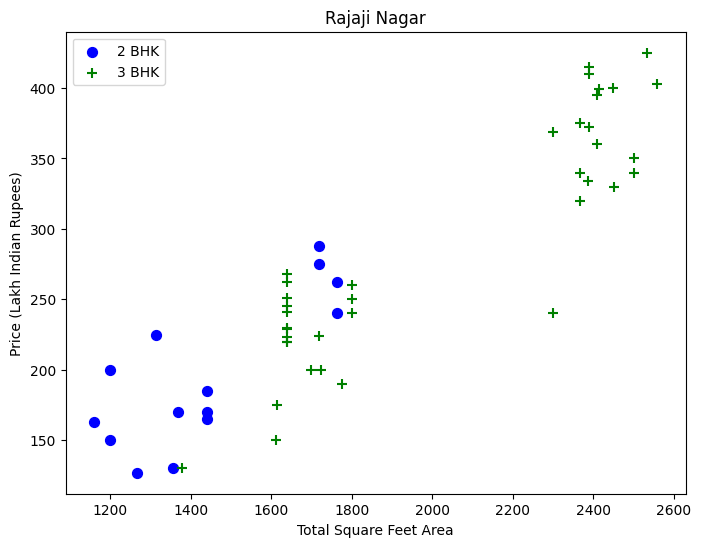

In [44]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df1,"Rajaji Nagar")

In [45]:
# Removing the houses whose prices are less than the mean price of their lower variant
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df1 = remove_bhk_outliers(df1)

df1.shape

(7331, 7)

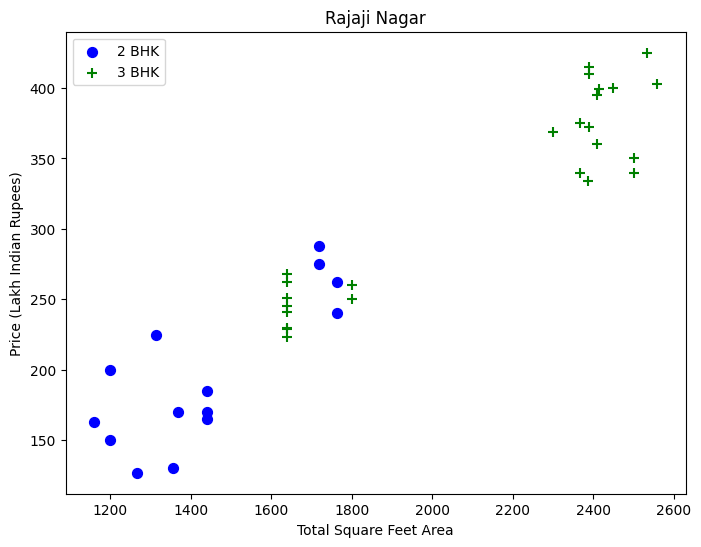

In [46]:
plot_scatter_chart(df1,"Rajaji Nagar")

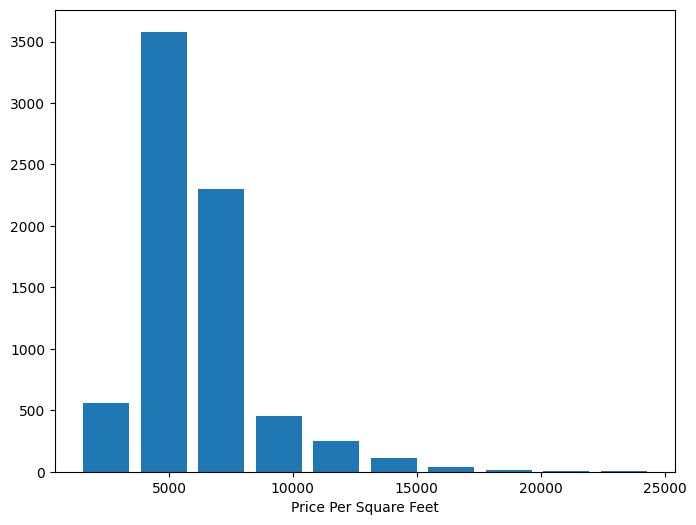

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,6)
plt.hist(df1.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet");

In [50]:
df1.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0.5, 0, 'Number of bathrooms')

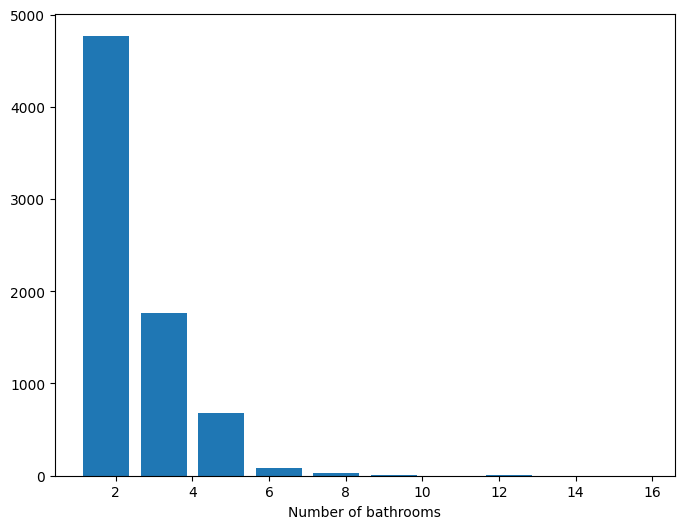

In [51]:
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")

In [52]:
df1[df1.bath>10]

,location,size,total_sqft,bath,price,price_per_sqft,bhk
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,4000.000000,10
8478,others,10 BHK,12000.0,12.0,525.0,4375.000000,10
8567,others,16 BHK,10000.0,16.0,550.0,5500.000000,16
9307,others,11 BHK,6000.0,12.0,150.0,2500.000000,11
9639,others,13 BHK,5425.0,13.0,275.0,5069.124424,13


In [53]:
df1 = df1[df1.bath<df1.bhk+2]
df1.shape

(7253, 7)

In [54]:
df1.head()

,location,size,total_sqft,bath,price,price_per_sqft,bhk
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,3200.000000,2
2,Devarachikkanahalli,2 BHK,1200.0,2.0,83.0,6916.666667,2
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,3418.803419,2
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,4561.403509,3
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,4540.654699,2


In [55]:
# Dropping the features that are of no use now size--> bhk, price_per_sqft
df1 = df1.drop(['size','price_per_sqft'],axis='columns')
df1.head(3)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2


## One hot encoding for location

In [56]:
dummies = pd.get_dummies(df1.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df1 = pd.concat([df1,dummies.drop('others',axis='columns')],axis='columns')
df1.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df1 = df1.drop('location',axis='columns')
df1.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df1.shape

(7253, 244)

## Model building

In [61]:
X = df1.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X.shape

(7253, 243)

In [63]:
y = df1.price
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [64]:
len(y)

7253

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7780866051090758

In [68]:
# K Fold cross-validation to measure the accuracy of our linear regression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84014922, 0.78873287, 0.86373278, 0.86871995, 0.88094502])

In [76]:
# Find the best model using GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                   #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.848456,{}
1,lasso,0.709012,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.751135,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [77]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [80]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.90092227786029

In [81]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.21288742331376

In [82]:
# Export the tested model to a pickle file
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [83]:
#Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

Problems faced:

1) Total sqft had some rows that were a range of values(eg 1200-2400)

2) Locations: around 1300 unique locations to deal with in text

one hot encoding